## Dependencies

In [1]:
import os
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
from zipfile import ZipFile 
from skimage import data
from skimage.transform import swirl, rotate
from skimage.io import imsave

##  Functions

### Dataset construction

In [2]:
 def construct_dataset():
    
    if "Mushroom dataset" not in os.listdir():
        print("Unzipping image dataset...")
        with ZipFile("Mushroom dataset.zip", 'r') as zObject: 
            zObject.extractall(path="Mushroom dataset")
        print("Done")
    
    dataset_directory = "Mushroom dataset/cnn/"

    lst = os.listdir(dataset_directory + "Edible")
    edible_count = len(lst)

    lst = os.listdir(dataset_directory + "Poisonous")
    poisonous_count = len(lst)

    dataset_x = np.empty([edible_count + poisonous_count, 227, 227, 3])
    dataset_y = np.empty([edible_count + poisonous_count, 1])
    
    print("Constructing dataset...")

    i = 0
    print("Adding edible...")
    for file in os.listdir(dataset_directory + "Edible"):
        dataset_x[i] = plt_img.imread(dataset_directory + "Edible/" + file) / 255
        dataset_y[i][0] = 0
        i += 1
    print("Done")

    print("Adding poisonous...")
    for file in os.listdir(dataset_directory + "Poisonous"):
        dataset_x[i] = plt_img.imread(dataset_directory + "Poisonous/" + file) / 255
        dataset_y[i][0] = 1
        i += 1
    print("Done")

    print("Exporting...")
    np.save("mushroom_dataset_x", dataset_x)
    np.save("mushroom_dataset_y", dataset_y)
    print("Done")
    
    return dataset_x, dataset_y

### Shuffle dataset

In [3]:
def shuffle_dataset(data_x, data_y):
    data_count = data_x.shape[0]
    shuffle_index = np.empty([data_count], dtype=np.int32)
    
    new_x = np.empty(data_x.shape)
    new_y = np.empty(data_y.shape)
    
    for i in range(0, data_count):
        shuffle_index[i] = i
        
    np.random.shuffle(shuffle_index)
    
    for i in range(0, data_count):
        random_index = shuffle_index[i]
        
        #if i == 500:
            #idx = random_index
        
        new_x[i] = data_x[random_index]
        new_y[i] = data_y[random_index]
        
    return new_x, new_y

### Sample dataset

In [4]:
def sample_dataset(data_x, data_y, n_count):
    x_shape = [n_count, data_x.shape[1], data_x.shape[2], data_x.shape[3]]
    y_shape = [n_count, data_y.shape[1]]
    
    new_x = np.empty(x_shape)
    new_y = np.empty(y_shape)
    
    for i in range(0, n_count):
        random_index = np.random.randint(0, data_x.shape[0])
        new_x[i] = data_x[random_index]
        new_y[i] = data_y[random_index]
        
    return new_x, new_y

## Loading dataset

In [5]:
lst = os.listdir() 
if ("mushroom_dataset_x.npy" not in lst) or ("mushroom_dataset_y.npy" not in lst):
    print("Dataset files not found, contructing...")
    dataset_x, dataset_y = construct_dataset()
else:
    print("Dataset files found, loading...")
    dataset_x = np.load("mushroom_dataset_x.npy")
    dataset_y = np.load("mushroom_dataset_y.npy")
    print("Done")

Dataset files found, loading...
Done


## Shuffle and sample

In [6]:
shuffle_x, shuffle_y = shuffle_dataset(dataset_x, dataset_y)
sample_x, sample_y = sample_dataset(shuffle_x, shuffle_y, 500)

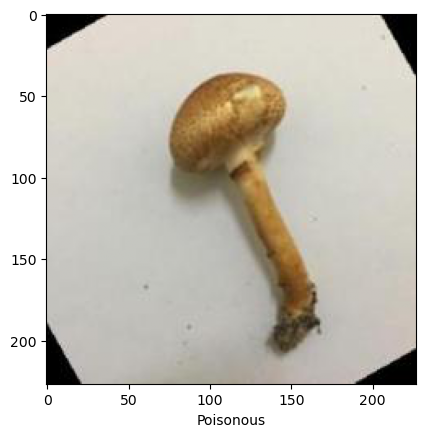

In [7]:
# Checking sampled dataset
x = 145
plt.imshow(sample_x[x])
if sample_y[x] == 0:
    plt.xlabel("Edible")
else:
    plt.xlabel("Poisonous")

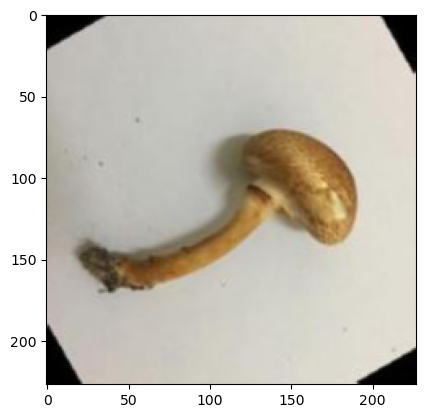

In [8]:
swirled = swirl(sample_x[x], rotation=0, strength=1, radius=200)
rotated = rotate(swirled, 270)
plt.imshow(rotated)

## Swirl and rotate images

In [9]:
swirled_x = np.empty((500, 227, 227, 3))

for i in range(0, len(sample_x)):
    swirled = swirl(sample_x[i], rotation=0, strength=1, radius=200)
    swirled_x[i] = rotate(swirled, np.random.randint(1, 360))

## Export images

In [12]:
int_swirled_x = (swirled_x * 255).astype(dtype="uint8")
path = "SwirlDataset/cnn/"
for i in range(0, 500):
    if sample_y[i] == 0.0:
        save_path = path + "Edible/img" + str(i) + ".jpg"
    else:
        save_path = path + "Poisonous/img" + str(i) + ".jpg"
        
    imsave(save_path, int_swirled_x[i])